In [28]:
import re
from collections import Counter, defaultdict

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.translate import bleu, ribes

from lazyme.fileio import find_files

In [2]:
dfs = []
for filename in sorted(find_files('Translator-HumanParityData/Evaluations', '*-EvalRound*-Subset*.csv')):
    eval_round, eval_subset = re.search(r'EvalRound(.*)-Subset(.*).csv', filename).groups()
    _df = pd.read_csv(filename)
    _df['EvalRound'] = eval_round
    _df['Subset'] = eval_subset
    dfs.append(_df)
    
meta1_df = pd.read_csv(next(find_files('Translator-HumanParityData/Evaluations', '*Meta1*')))
meta1_df['EvalRound'] = '1a-c'
meta1_df['Subset'] = '1'
    
dfs.append(meta1_df)
df = pd.concat(dfs)

In [3]:
df.head()

,UserID,SystemID,SegmentID,Type,Score,StartTime,EndTime,EvalRound,Subset
0,zhoeng2707,Online-B-1710,1187,TGT,81,1.520540e+09,1.520540e+09,1a,1
1,zhoeng2707,Online-A-1710,1187,TGT,97,1.520540e+09,1.520540e+09,1a,1
2,zhoeng2707,Combo-5,1709,CHK,97,1.520540e+09,1.520540e+09,1a,1
3,zhoeng2707,Combo-6,1709,CHK,97,1.520540e+09,1.520540e+09,1a,1
4,zhoeng2707,Reference-PE,1187,TGT,100,1.520540e+09,1.520540e+09,1a,1


In [4]:
Counter(df['SystemID'])

Counter({'Combo-4': 5898,
         'Combo-5': 5702,
         'Combo-6': 5696,
         'Online-A-1710': 5656,
         'Online-B-1710': 5619,
         'Reference-HT': 5688,
         'Reference-PE': 5644,
         'Reference-WMT': 5616,
         'Sogou': 5655})

In [5]:
Counter(df[df['Score'] >= 100]['SystemID'])

Counter({'Combo-4': 50,
         'Combo-5': 51,
         'Combo-6': 60,
         'Online-A-1710': 27,
         'Online-B-1710': 16,
         'Reference-HT': 35,
         'Reference-PE': 25,
         'Reference-WMT': 37,
         'Sogou': 38})

In [9]:
X = np.array(range(101))
Y = defaultdict(list)

systems = set(df['SystemID'])
for s in systems:
    for _x in X:
        Y[s].append(Counter(df[(df['Score'] == _x)]['SystemID'])[s])

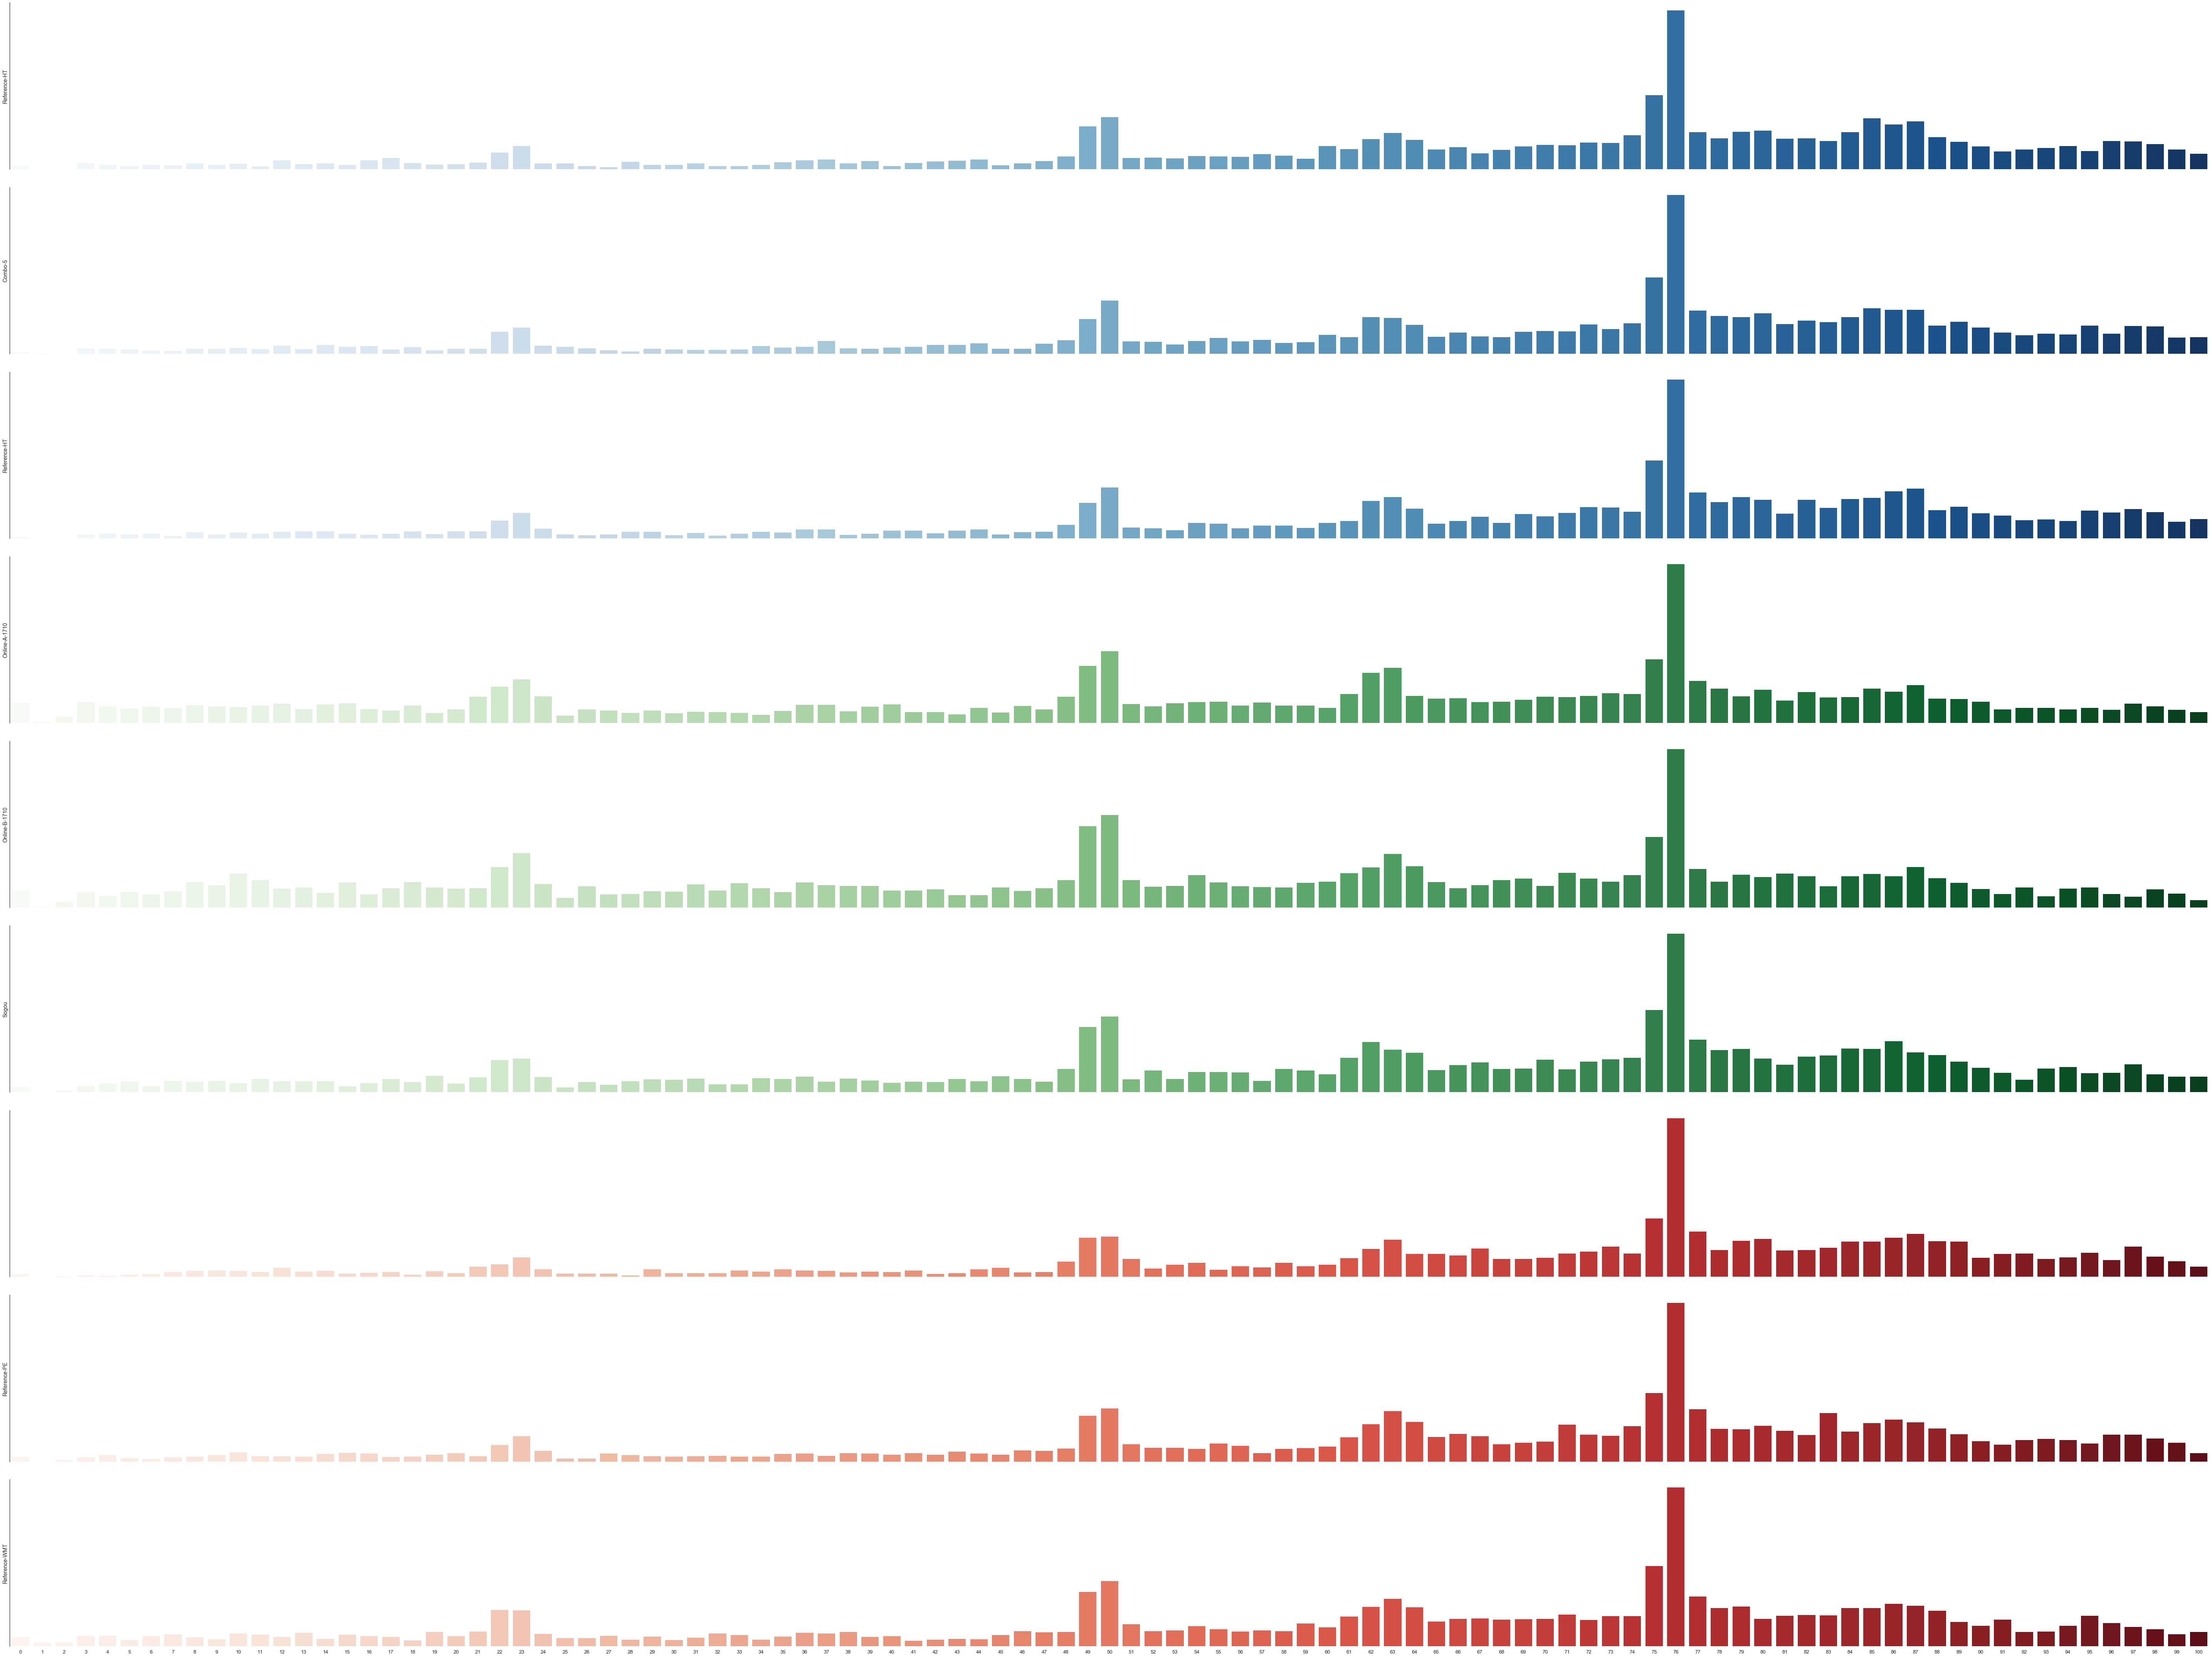

In [42]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9, 1, figsize=(80, 60), sharex=True)

# Generate some sequential data
x = X
y1 = Y['Combo-4']
sns.barplot(x, y1, palette="Blues", ax=ax1)
ax1.set_ylabel("Reference-HT")

# Center the data to make it diverging
y2 = Y['Combo-5']
sns.barplot(x, y2, palette="Blues", ax=ax2)
ax2.set_ylabel("Combo-5")


# Randomly reorder the data to make it qualitative
y3 = Y['Combo-6']
sns.barplot(x, y3, palette="Blues", ax=ax3)
ax3.set_ylabel("Combo-6")


# Randomly reorder the data to make it qualitative
y4 = Y['Online-A-1710']
sns.barplot(x, y4, palette="Greens", ax=ax4)
ax4.set_ylabel('Online-A-1710')

# Randomly reorder the data to make it qualitative
y5 = Y['Online-B-1710']
sns.barplot(x, y5, palette="Greens", ax=ax5)
ax5.set_ylabel('Online-B-1710')

# Randomly reorder the data to make it qualitative
y6 = Y['Sogou']
sns.barplot(x, y6, palette="Greens", ax=ax6)
ax6.set_ylabel('Sogou')


# Randomly reorder the data to make it qualitative
y7 = Y['Reference-HT']
sns.barplot(x, y7, palette="Reds", ax=ax7)
ax3.set_ylabel("Reference-HT")


# Randomly reorder the data to make it qualitative
y8 = Y['Reference-PE']
sns.barplot(x, y8, palette="Reds", ax=ax8)
ax8.set_ylabel('Reference-PE')

# Randomly reorder the data to make it qualitative
y9 = Y['Reference-WMT']
sns.barplot(x, y9, palette="Reds", ax=ax9)
ax9.set_ylabel('Reference-WMT')


# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=3)